# Training a network on the CIFAR10 dataset

We'll train a custom network on the cifar10 dataset. CIFAR10 is a dataset of images categorized into 10 categories. Goal of the network is to classify the images into the correct category.

Let's start with loading any libraries you need.

In [56]:
# Load libraries you need here
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

Load the data from the CIFAR10. The CIFAR-10 dataset contains 60,000 32x32 color images in 10 classes.
Info can be found in the documentation: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data

In [31]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

X_train, X_test = X_train / 255, X_test / 255

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((40000, 32, 32, 3),
 (10000, 32, 32, 3),
 (10000, 32, 32, 3),
 (40000, 10),
 (10000, 10),
 (10000, 10))

Create your model using conv2D layers, some type of pooling and finish with a dense network.

In [42]:

model = Sequential()
# conv2d layer
model.add(
    Conv2D(
        filters=32, # number of filters
        kernel_size=(3, 3), # height/width of filter
        activation='relu', # activation function
        input_shape=(32, 32, 3), # shape of input (image)
        padding='same',
        kernel_regularizer=regularizers.l2(0.02)
    ))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
model.add(Dropout(0.2))

model.add(
    Conv2D(
        filters=32, # number of filters
        kernel_size=(3, 3),
        activation='relu',
        padding='same',
        kernel_regularizer=regularizers.l2(0.02)
    )
)

model.add(Dropout(0.2))
model.add(
    Conv2D(
        filters=128, # number of filters
        kernel_size=(3, 3),
        activation='relu',
        padding='same',
        kernel_regularizer=regularizers.l2(0.02)
    )
)
model.add(
    Conv2D(
        filters=128, # number of filters
        kernel_size=(3, 3),
        activation='relu',
        padding='same'
    )
)

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
model.add(MaxPooling2D(pool_size = (2, 2), padding='same', strides=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])# loss function måste vara rätt annars blir shapes fel


Train your model. Since the dataset is so big not a lot of epochs should be needed to start seeing results.

In [43]:

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1250/1250 [==============================] - 53s 42ms/step - loss: 1.8953 - accuracy: 0.3420 - val_loss: 1.5905 - val_accuracy: 0.4444
Epoch 2/10
1250/1250 [==============================] - 51s 41ms/step - loss: 1.5615 - accuracy: 0.4563 - val_loss: 1.4720 - val_accuracy: 0.4883
Epoch 3/10
1250/1250 [==============================] - 53s 42ms/step - loss: 1.4566 - accuracy: 0.5011 - val_loss: 1.3946 - val_accuracy: 0.5268
Epoch 4/10
1250/1250 [==============================] - 57s 46ms/step - loss: 1.3835 - accuracy: 0.5319 - val_loss: 1.3271 - val_accuracy: 0.5568
Epoch 5/10
1250/1250 [==============================] - 53s 42ms/step - loss: 1.3118 - accuracy: 0.5618 - val_loss: 1.2390 - val_accuracy: 0.5919
Epoch 6/10
1250/1250 [==============================] - 51s 41ms/step - loss: 1.2629 - accuracy: 0.5818 - val_loss: 1.2172 - val_accuracy: 0.5942
Epoch 7/10
1250/1250 [==============================] - 50s 40ms/step - loss: 1.2250 - accuracy: 0.5973 - val_loss: 1.2125 -

Visualize the model performance

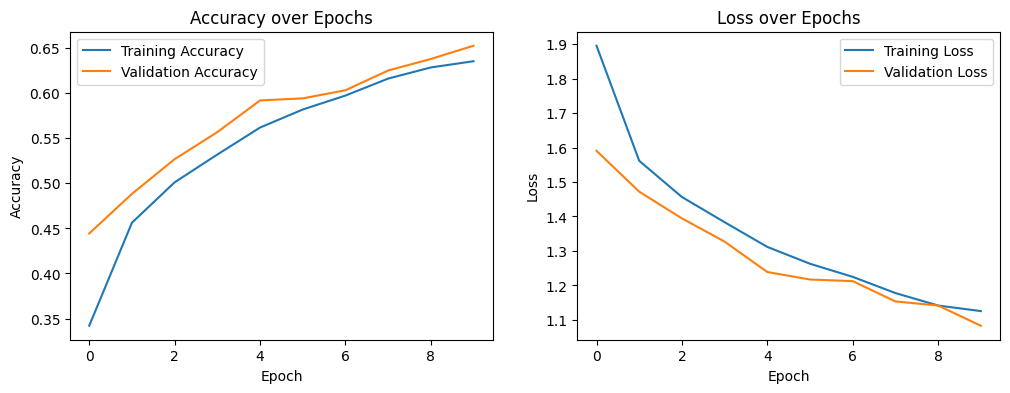

In [44]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Evaluate on the test set

In [55]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

# prints and plots you might need to evaluate.
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

313/313 - 4s - loss: 1.0981 - accuracy: 0.6455 - 4s/epoch - 12ms/step
Test loss: 1.0981276035308838
Test accuracy: 0.6455000042915344


# Excercise
Experiment with different architectures and try to find a model that performs well.